In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import seaborn as sns
# sns.set_theme()

import scienceplots
plt.style.use(['science','no-latex'])

import plotly.express as px
import pandas as pd

In [5]:
data = {}

data["ResNet-18"] = np.load("output/static_imagenet_resnet18.npy")
data["ResNet-34"] = np.load("output/static_imagenet_resnet34.npy")
data["ResNet-50"] = np.load("output/static_imagenet_tv_resnet50.npy")
data["DenseNet-121"] = np.load("output/static_imagenet_tv_densenet121.npy")
data["VGG-16bn"] = np.load("output/static_imagenet_vgg16_bn.npy")

data["ResNet-101 (timm)"] = np.load("output/static_imagenet_resnet101.npy")

data["ResNet-50 (timm)"] = np.load("output/static_imagenet_resnet50.npy")
data["ViT-B/16"] = np.load("output/static_imagenet_vit_base_patch16_224.npy")
data["ConvNeXt-B"] = np.load("output/static_imagenet_convnext_base.npy")

for k, v in data.items():
    data[k] = 100 * v

ResNet-50 (timm) 79.704 75.08 0.6900000000000001
ResNet-101 (timm) 81.64 79.364 0.67
ViT-B/16 85.026 82.826 0.23
ConvNeXt-B 85.422 80.49199999999999 0.5
ResNet-18 67.82000000000001 18.512 0.11
ResNet-34 73.44800000000001 27.250000000000004 0.1
ResNet-50 74.602 22.644000000000002 0.12
DenseNet-121 73.288 28.432000000000002 0.09
VGG-16bn 71.99 20.624000000000002 0.13


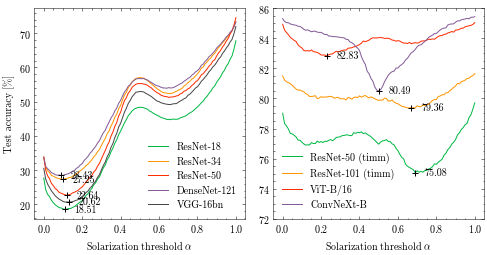

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3.75), sharex=True)


def make_plot(ax, model_names):
    C = 0
    
    x = np.arange(0, 1.00001, 0.01)
    
    for k in model_names:

        v = data[k]

        ax.plot(x, v, label=k, zorder=1, color = f"C{1+C}")
        C += 1
            
        print(k, v.max(), v.min(), x[v.argmin()])

#         for pos in [v.argmin() / (len(x) - 1)]:

        min_x = x[v.argmin()]
        min_y = v[v.argmin()]

        hoff = 0
        voff = 0
#         if pos == 0:
#             ha = "left"
#             hoff = 0.03
#         elif pos == 1:
#             ha = "right"
#             hoff = -0.03
#         else:
#                 ha = "center"
#                 voff = 0.4
        ha = "left"
        hoff = 0.05

        ax.scatter(min_x, min_y, marker="+", color="black", zorder=2)
        ax.text(min_x + hoff, min_y + voff, s=f"{min_y:.2f}", 
                 horizontalalignment=ha, verticalalignment="center", zorder=2)

    ax.legend()
    ax.set_xlabel(r"Solarization threshold $\alpha$")
    
    
make_plot(axes[1], ["ResNet-50 (timm)", "ResNet-101 (timm)", "ViT-B/16", "ConvNeXt-B"])
axes[1].set_ylim(72, 86)
make_plot(axes[0], ["ResNet-18", "ResNet-34", "ResNet-50", "DenseNet-121", "VGG-16bn"])
    
axes[0].set_ylabel("Test accuracy [%]")
plt.tight_layout()

plt.savefig('output/imagenet_nonadv_sol.pdf', bbox_inches='tight', pad_inches=0.01)
pass

In [14]:
fig = px.line(
    pd.DataFrame.from_dict(data, orient="columns"),
    labels={
        "value": "Accuracy [%]",
        "index": r"Solarization Threshold",
        "variable": "Model",
    },
    width=970 * 0.65,
    height=600 * 0.65,
    
)
fig.update_layout(
   legend=dict(
            yanchor="top",
            y=1.15,
            xanchor="left",
            x=0,
            orientation="h"
        ),
)

fig.update_layout(
        xaxis=dict(
            tickvals=sorted(x),
        )
    )

# fig.for_each_trace(lambda t: t.update(legendrank={"conv3x3": 0, "None": 1}[t.name]))
# fig.for_each_trace(
#     lambda t: t.update(name={"conv3x3": "Frozen Random", "None": "Learnable"}[t.name])
# )
# fig.update_layout(
#     margin=dict(l=0, r=0, b=0, t=0),
# )
# fig.write_image(f"plots/wandb/resnet_freezing.pdf")
fig

TypeError: line() got an unexpected keyword argument 'smooth'

In [53]:
for k, v in data.items():
    print(k)
    print("max", v.max())
    print("max diff", (v.max() - v.min()))
    print("minimum", x[v.argmin()])
    print()

ResNet-50
max 79.704
max diff 4.623999999999995
minimum 0.6900000000000001

ViT-B/16
max 85.026
max diff 2.200000000000003
minimum 0.23

ConvNeXt-B
max 85.422
max diff 4.930000000000007
minimum 0.5

